In [1]:
import re

# 첫 번째 파일: success_app.txt에서 숫자만 추출
with open("success_app.txt", "r", encoding="utf-8") as file:
    lines1 = file.readlines()

numbers1 = {re.search(r'\d+', line).group() for line in lines1 if re.search(r'\d+', line)}

# 두 번째 파일: sendPing.txt에서 ':' 뒤의 숫자만 추출
with open("sendPing.txt", "r", encoding="utf-8") as file:
    lines2 = file.readlines()

numbers2 = {line.split(":")[1].strip() for line in lines2 if ":" in line}

# sendPing에서 success_app에 없는 숫자만 추출
unique_numbers = sorted(numbers2 - numbers1, key=int)

# 결과 출력
print("sendPing.txt에서 success_app.txt에 없는 숫자:", unique_numbers)


sendPing.txt에서 success_app.txt에 없는 숫자: ['0', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '1

In [2]:
import pandas as pd
import re
from collections import Counter

with open("rerr.txt", "r") as file:
    lines = file.readlines()

node_numbers = [re.search(r'node\[(\d+)\]', line) for line in lines]
node_numbers = [match.group(1) for match in node_numbers if match]

node_counts = Counter(node_numbers)

df = pd.DataFrame(node_counts.items(), columns=["Node", "Count"])

df["Percentage"] = (df["Count"] / df["Count"].sum()) * 100

df = df.sort_values(by="Count", ascending=False)
df.to_excel("node_rerr.xlsx", index=False)
print(df)


    Node  Count  Percentage
31     8     32    5.079365
1     32     26    4.126984
0     17     24    3.809524
6      4     21    3.333333
2      0     20    3.174603
..   ...    ...         ...
109  112      1    0.158730
110   72      1    0.158730
111   65      1    0.158730
112   13      1    0.158730
143  168      1    0.158730

[144 rows x 3 columns]


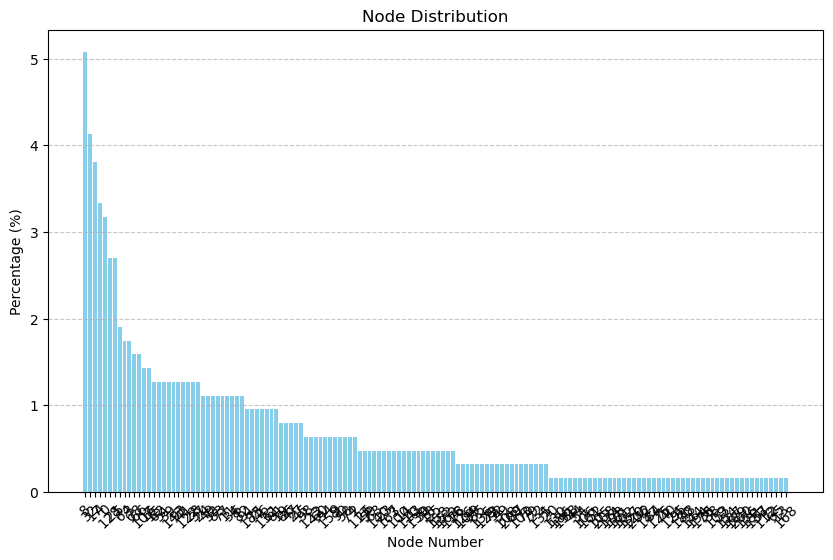

In [3]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

with open("rerr.txt", "r") as file:
    lines = file.readlines()

node_numbers = [re.search(r'node\[(\d+)\]', line) for line in lines]
node_numbers = [match.group(1) for match in node_numbers if match]

node_counts = Counter(node_numbers)

df = pd.DataFrame(node_counts.items(), columns=["Node", "Count"])

df["Percentage"] = (df["Count"] / df["Count"].sum()) * 100

df = df.sort_values(by="Count", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df["Node"], df["Percentage"], color='skyblue')
plt.xlabel("Node Number")
plt.ylabel("Percentage (%)")
plt.title("Node Distribution")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


c:\Users\whdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\whdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\whdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\whdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\whdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\whdgu\anacond

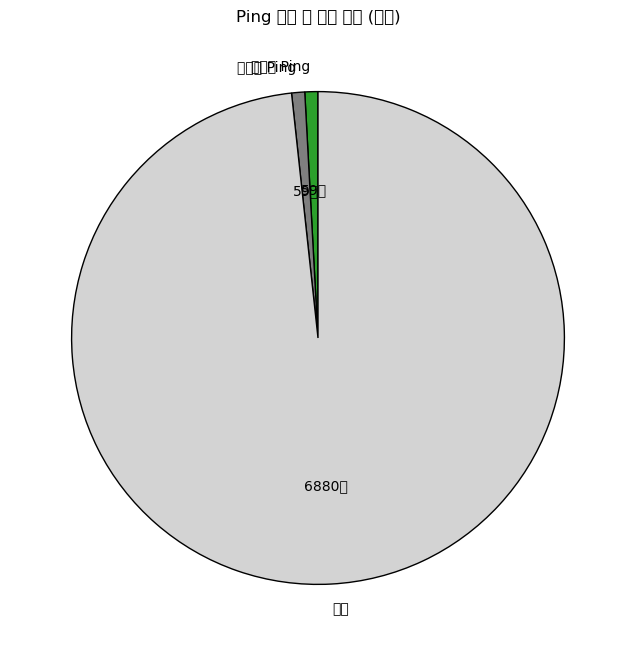

In [4]:
import re
import matplotlib.pyplot as plt

# success_app.txt에서 숫자만 추출
with open("success_app.txt", "r", encoding="utf-8") as file:
    lines1 = file.readlines()
numbers1 = {re.search(r'\d+', line).group() for line in lines1 if re.search(r'\d+', line)}

# sendPing.txt에서 ':' 뒤의 숫자만 추출
with open("sendPing.txt", "r", encoding="utf-8") as file:
    lines2 = file.readlines()
numbers2 = {line.split(":")[1].strip() for line in lines2 if ":" in line}

# 성공 및 실패한 ping 계산
success_numbers = numbers1 & numbers2  # 성공한 ping (겹치는 숫자)
fail_numbers = numbers2 - numbers1  # 실패한 ping (없는 숫자)
success_count = len(success_numbers)
fail_count = len(fail_numbers)

# 너무 작은 조각을 방지하기 위해 일정 수 이상이면 개별 조각으로 표현, 아니면 '기타'로 묶음
threshold = max(success_count, fail_count) * 0.01  # 전체의 1% 이하이면 묶음 처리
success_list = list(success_numbers)
fail_list = list(fail_numbers)

# 데이터 정리
data = {
    "성공한 Ping": success_list[:int(threshold)],  # 상위 일부 성공 핑
    "실패한 Ping": fail_list[:int(threshold)],  # 상위 일부 실패 핑
    "기타": success_list[int(threshold):] + fail_list[int(threshold):]  # 나머지 묶음
}

sizes = [len(data["성공한 Ping"]), len(data["실패한 Ping"]), len(data["기타"])]
labels = ["성공한 Ping", "실패한 Ping", "기타"]
colors = ['#2ca02c', '#7f7f7f', '#d3d3d3']  # 초록(성공), 회색(실패), 연회색(기타)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{int(p * sum(sizes) / 100)}개', colors=colors,
        startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Ping 성공 및 실패 개수 (요약)")
plt.show()


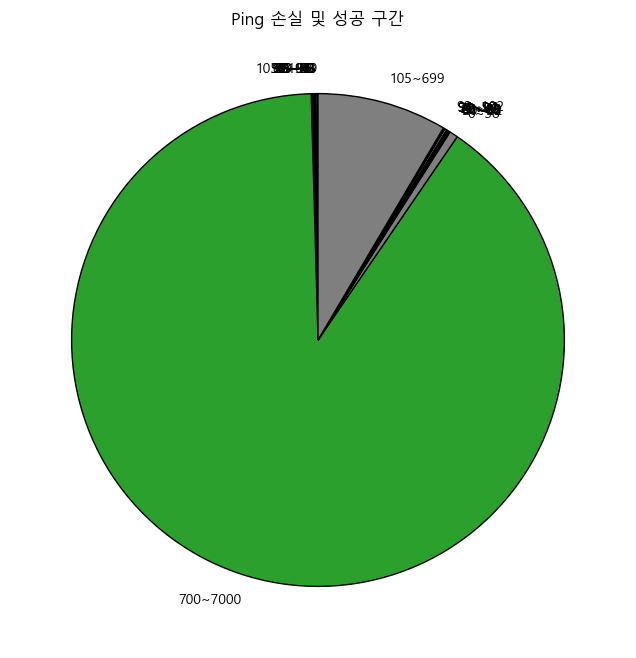

In [1]:
import re
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

# 한글 폰트 설정
if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# success_app.txt에서 숫자만 추출
with open("success_app.txt", "r", encoding="utf-8") as file:
    lines1 = file.readlines()
numbers1 = {int(re.search(r'\d+', line).group()) for line in lines1 if re.search(r'\d+', line)}

# sendPing.txt에서 ':' 뒤의 숫자만 추출
with open("sendPing.txt", "r", encoding="utf-8") as file:
    lines2 = file.readlines()
numbers2 = {int(line.split(":")[1].strip()) for line in lines2 if ":" in line}

# 전체 Ping 범위 (0~7000)
min_ping = 0
max_ping = 7000

# 실패한 ping (없는 숫자) 계산
fail_numbers = sorted(numbers2 - numbers1)

# 손실된 구간 찾기
loss_ranges = []
start = None

for i in range(len(fail_numbers)):
    if start is None:
        start = fail_numbers[i]
    if i == len(fail_numbers) - 1 or fail_numbers[i] + 1 != fail_numbers[i + 1]:
        loss_ranges.append((start, fail_numbers[i]))
        start = None

# 성공한 구간 찾기
success_ranges = []
prev_end = min_ping

for start, end in loss_ranges:
    if prev_end < start:
        success_ranges.append((prev_end, start - 1))
    prev_end = end + 1

if prev_end <= max_ping:
    success_ranges.append((prev_end, max_ping))

# 전체 원을 기준으로 손실된 구간과 성공한 구간을 나눠 파이 차트로 표현
labels = []
sizes = []
colors = []

for start, end in success_ranges:
    labels.append(f"{start}~{end}")
    sizes.append(end - start + 1)
    colors.append('#2ca02c')  # 성공한 구간 (초록색)

for start, end in loss_ranges:
    labels.append(f"{start}~{end}")
    sizes.append(end - start + 1)
    colors.append('#7f7f7f')  # 손실된 구간 (회색)

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Ping 손실 및 성공 구간")
plt.show()


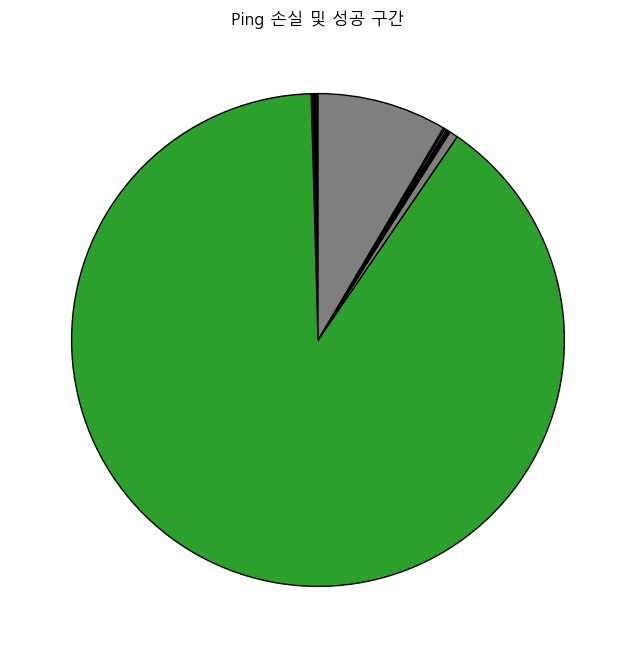

In [2]:
import re
import matplotlib.pyplot as plt

# success_app.txt에서 숫자만 추출
with open("success_app.txt", "r", encoding="utf-8") as file:
    lines1 = file.readlines()
numbers1 = {int(re.search(r'\d+', line).group()) for line in lines1 if re.search(r'\d+', line)}

# sendPing.txt에서 ':' 뒤의 숫자만 추출
with open("sendPing.txt", "r", encoding="utf-8") as file:
    lines2 = file.readlines()
numbers2 = {int(line.split(":")[1].strip()) for line in lines2 if ":" in line}

# 전체 Ping 범위 (0~7000)
min_ping = 0
max_ping = 7000

# 실패한 ping (없는 숫자) 계산
fail_numbers = sorted(numbers2 - numbers1)

# 손실된 구간 찾기
loss_ranges = []
start = None

for i in range(len(fail_numbers)):
    if start is None:
        start = fail_numbers[i]
    if i == len(fail_numbers) - 1 or fail_numbers[i] + 1 != fail_numbers[i + 1]:
        loss_ranges.append((start, fail_numbers[i]))
        start = None

# 성공한 구간 찾기
success_ranges = []
prev_end = min_ping

for start, end in loss_ranges:
    if prev_end < start:
        success_ranges.append((prev_end, start - 1))
    prev_end = end + 1

if prev_end <= max_ping:
    success_ranges.append((prev_end, max_ping))

# 전체 원을 기준으로 손실된 구간과 성공한 구간을 나눠 파이 차트로 표현
sizes = []
colors = []

for start, end in success_ranges:
    sizes.append(end - start + 1)
    colors.append('#2ca02c')  # 성공한 구간 (초록색)

for start, end in loss_ranges:
    sizes.append(end - start + 1)
    colors.append('#7f7f7f')  # 손실된 구간 (회색)

# 파이 차트 그리기 (라벨 제거)
plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Ping 손실 및 성공 구간")
plt.show()


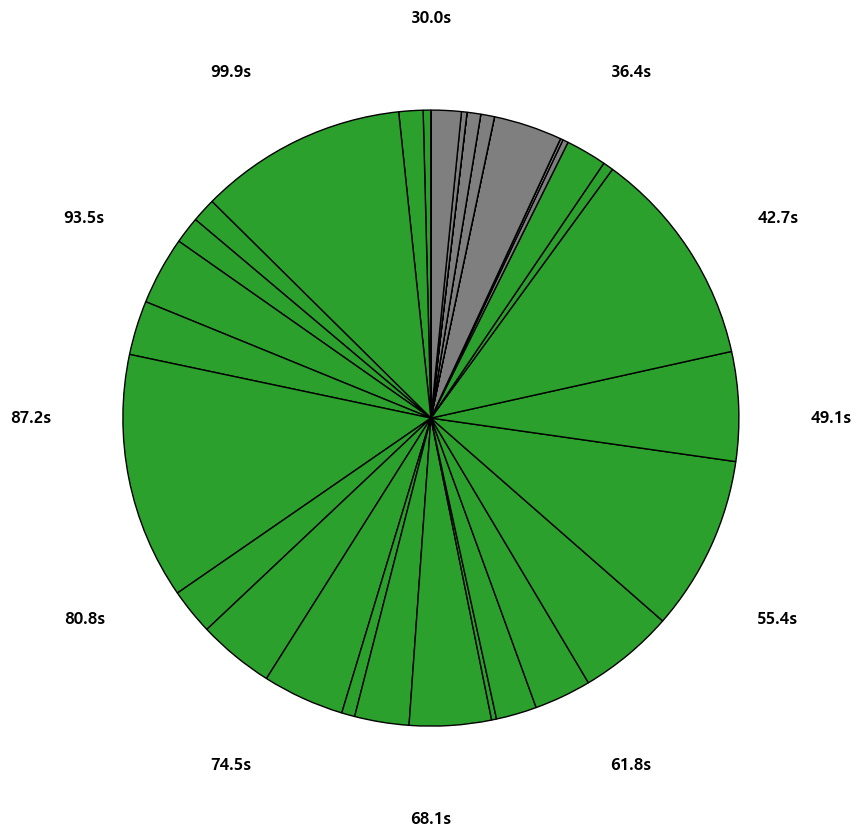

In [46]:
import re
import time
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

# 한글 폰트 설정
if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# 시작 시간 기록
start_time = time.time()

# 파일 읽기 및 데이터 처리
file_read_start = time.time()
success_pings = {}
send_pings = {}

# success_app.txt에서 성공한 Ping 시간 추출
with open("success_app.txt", "r", encoding="utf-8") as file:
    for line in file:
        match = re.search(r'([\d.]+) : ping(\d+)-reply', line)
        if match:
            time_value = float(match.group(1))
            ping_num = int(match.group(2))
            success_pings[ping_num] = time_value

# sendPing.txt에서 전체 Ping 요청 시간 추출
with open("sendPing.txt", "r", encoding="utf-8") as file:
    for line in file:
        match = re.search(r'([\d.]+):(\d+):', line)
        if match:
            time_value = float(match.group(1))
            ping_num = int(match.group(2))
            send_pings[ping_num] = time_value

file_read_end = time.time()

# 손실된 Ping 찾기 (sendPing에 있지만 success_app에 없는 Ping)
fail_pings = {ping: time for ping, time in send_pings.items() if ping not in success_pings}

# 손실된 Ping의 시간 리스트 정렬
fail_times = sorted(fail_pings.values())

# 손실된 시간 구간 계산
loss_ranges = []
start = None

for i in range(len(fail_times)):
    if start is None:
        start = fail_times[i]
    if i == len(fail_times) - 1 or fail_times[i + 1] - fail_times[i] > 0.2:  # 0.2초 이상 차이 나면 새로운 구간으로 분리
        loss_ranges.append((start, fail_times[i]))
        start = None

# 성공한 시간 구간 계산
success_ranges = []
prev_end = min(send_pings.values())

for start, end in loss_ranges:
    if prev_end < start:
        success_ranges.append((prev_end, start - 0.01))
    prev_end = end + 0.01

if prev_end <= max(send_pings.values()):
    success_ranges.append((prev_end, max(send_pings.values())))

# 그래프 그리기
plot_start = time.time()
labels = []
sizes = []
colors = []

# 성공한 구간 추가
for start, end in success_ranges:
    sizes.append(end - start)
    colors.append('#2ca02c')  # 초록색 (성공한 구간)

# 손실된 구간 추가
for start, end in loss_ranges:
    sizes.append(end - start)
    colors.append('#7f7f7f')  # 회색 (손실된 구간)

# 파이 차트 생성
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(
    sizes, colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'}
)

# 시계 숫자 추가
angles = np.linspace(90, -270, 12, endpoint=False)  # 12개 위치
time_labels = [f"{i:.1f}s" for i in np.linspace(min(send_pings.values()), max(send_pings.values()), 12)]

for angle, label in zip(angles, time_labels):
    x = np.cos(np.radians(angle)) * 1.3
    y = np.sin(np.radians(angle)) * 1.3
    ax.text(x, y, label, ha='center', va='center', fontsize=12, fontweight='bold')

plt.title("", fontsize=14, fontweight='bold')
plt.show()

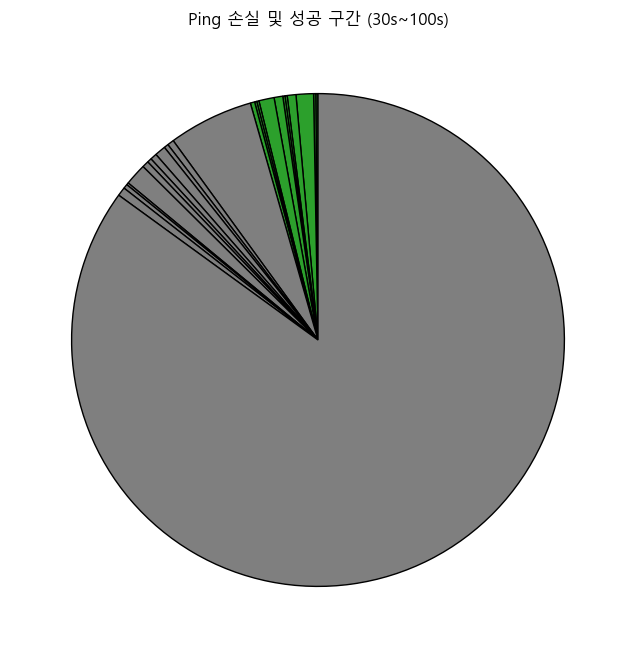

In [29]:
import re
import matplotlib.pyplot as plt

# success_app.txt에서 숫자만 추출
with open("success_app.txt", "r", encoding="utf-8") as file:
    lines1 = file.readlines()
numbers1 = {int(re.search(r'\d+', line).group()) for line in lines1 if re.search(r'\d+', line)}

# sendPing.txt에서 ':' 뒤의 숫자만 추출
with open("sendPing.txt", "r", encoding="utf-8") as file:
    lines2 = file.readlines()
numbers2 = {int(line.split(":")[1].strip()) for line in lines2 if ":" in line}

# 실패한 ping (없는 숫자) 계산
fail_numbers = sorted(numbers2 - numbers1)

# 손실된 구간 찾기
loss_ranges = []
start = None

for i in range(len(fail_numbers)):
    if start is None:
        start = fail_numbers[i]
    if i == len(fail_numbers) - 1 or fail_numbers[i] + 1 != fail_numbers[i + 1]:
        loss_ranges.append((start, fail_numbers[i]))
        start = None

# 성공한 구간 찾기
success_ranges = []
prev_end = min(numbers2)  # 시퀀스 번호의 최소값

for start, end in loss_ranges:
    if prev_end < start:
        success_ranges.append((prev_end, start - 1))
    prev_end = end + 1

if prev_end <= max(numbers2):  # 시퀀스 번호의 최대값
    success_ranges.append((prev_end, max(numbers2)))

# 전체 원을 기준으로 손실된 구간과 성공한 구간을 나눠 파이 차트로 표현
sizes = []
colors = []

for start, end in success_ranges:
    sizes.append(end - start + 1)
    colors.append('#2ca02c')  # 성공한 구간 (초록색)

for start, end in loss_ranges:
    sizes.append(end - start + 1)
    colors.append('#7f7f7f')  # 손실된 구간 (회색)

# 파이 차트 그리기 (30s~100s 구간만 포함)
plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Ping 손실 및 성공 구간 (30s~100s)")
plt.show()


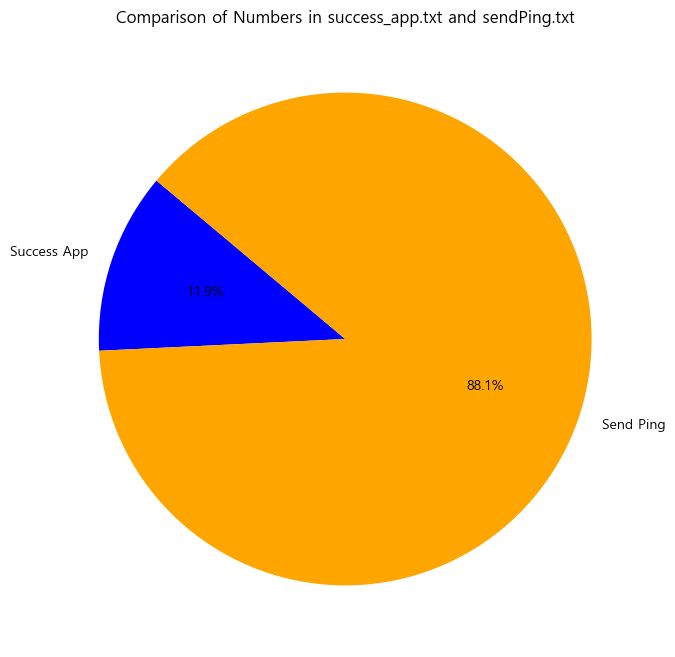

In [7]:
# 원형 차트를 위한 데이터 준비
labels = ["Success App", "Send Ping"]
sizes = [len(numbers1), len(numbers2)]

# 원형 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=["blue", "orange"])
plt.title("Comparison of Numbers in success_app.txt and sendPing.txt")
plt.show()


In [8]:
import pandas as pd

# 파일 불러오기 (encoding 문제 방지를 위해 utf-8 시도)
success_app = pd.read_csv("success_app.txt", sep=":", header=None, names=["time", "ping"], encoding="utf-8")
density_count = pd.read_csv("densityCount.txt", sep=":", header=None, names=["time", "count"], encoding="utf-8")

# 컬럼이 문자열이 아닐 경우 변환 후 .str 사용
success_app["time"] = success_app["time"].astype(str).str.strip()
density_count["time"] = density_count["time"].astype(str).str.strip()

# 숫자가 아닌 행 제거 후 변환
success_app = success_app[pd.to_numeric(success_app["time"], errors="coerce").notna()]
density_count = density_count[pd.to_numeric(density_count["time"], errors="coerce").notna()]

# float 변환 후 반올림
success_app["time"] = success_app["time"].astype(float).round(6)
density_count["time"] = density_count["time"].astype(float).round(6)

# 시간 겹치는 데이터 찾기
merged_data = pd.merge(success_app, density_count, on="time", how="inner")

# 결과 저장
merged_data.to_csv("matched_densityCount.txt", sep=":", index=False, header=False)
